## Organizing data

#### Libraries

In [ ]:
# install this package
!pip install nxviz=='0.6.3'

In [ ]:
!pip install geocoder==1.38.1

In [ ]:
!pip install matplotlib==3.1.3

In [39]:
# import usefull packages
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import nxviz as nv
import seaborn as sns
import pandas as pd
sns.set()

#### Download dataset

In [4]:
# download the dataset 
!gdown https://drive.google.com/uc?id=1D6jzFOjydIWJRsXe8wf_yTU7CkEGjaFZ

Downloading...
From: https://drive.google.com/uc?id=1D6jzFOjydIWJRsXe8wf_yTU7CkEGjaFZ
To: /content/dataset_flights_brazil.zip
100% 112M/112M [00:00<00:00, 120MB/s]


#### Unziping files

In [ ]:
!unzip dataset_flights_brazil

#### Transforming and organizing the files

In [6]:
# download csv files from sources
!python3 extract.py

# transform to final files
!python3 transform_to_anac_csv.py
!python3 transform_to_airports_csv.py
!python3 transform_to_graphml.py

100% 23/23 [09:18<00:00, 24.29s/it]
transform_to_anac_csv.py:7: DtypeWarning: Columns (24,25,29) have mixed types.Specify dtype option on import or set low_memory=False.
  combined_csv = pd.concat([pd.read_csv(file, sep=';', encoding='ISO-8859-1') for file in files])
sys:1: DtypeWarning: Columns (24,25,29) have mixed types.Specify dtype option on import or set low_memory=False.


## Preprocessing data


As there are some airports that are not part of Brazil, and we are only performing the analysis for Brazilian airports, it is important to separate them and remove them from the graph

In [7]:
path = 'data/air_traffic.graphml'

In [8]:
G = nx.read_graphml(path)
print("The network has {} nodes and {} edges".format(G.number_of_nodes(),
                                                     G.number_of_edges()))

The network has 1116 nodes and 9975 edges


In [9]:
# just look how the nodes are represented in the Network
G.nodes(data=True)

NodeDataView({'KDFW': {'name': 'DALLAS & FORT WORTH, TEXAS', 'region': nan, 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': 32.896801, 'longitude': -97.038002}, 'KJFK': {'name': 'NEW YORK, NEW YORK', 'region': nan, 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': 40.639801, 'longitude': -73.7789}, 'KLAX': {'name': 'LOS ANGELES, CALIFORNIA', 'region': nan, 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': 33.942501, 'longitude': -118.407997}, 'KMCO': {'name': 'ORLANDO, FLORIDA', 'region': nan, 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': 28.429399490356445, 'longitude': -81.30899810791016}, 'KMIA': {'name': 'MIAMI, FLORIDA', 'region': nan, 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': 25.79319953918457, 'longitude': -80.29060363769531}, 'KTPA': {'name': 'TAMPA, FLORIDA', 'region': nan, 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': 27.975500106811523, 'longitude': -82.533203125}, 'MYNN': {'name': 'NASSAU/INTL NEW PROVIDENCE', 'region': nan, 'country': 'BAHAMAS

In [10]:
# assignment to NaN or NaT values
for node in G.nodes:
  if pd.isna(G.nodes[node]['region']):
    G.nodes[node]['region'] = 'INTERNACIONAL'

In [11]:
# checking the regions
check = set()
for node in G.nodes:
  check.add(G.nodes[node]['region'])
print(check)

{'INTERNACIONAL', ' ', 'NORTE', 'NORDESTE', 'SUL', 'SUDESTE', 'CENTRO-OESTE', 'NÃO IDENTIFICADO'}


In [12]:
nodes_BR = []
for node in G.nodes:
  if G.nodes[node]['region'] != 'INTERNACIONAL' and G.nodes[node]['region'] != ' ' and G.nodes[node]['region'] != 'NÃO IDENTIFICADO':
    nodes_BR.append(node)

In [13]:
G_BR = G.subgraph(nodes_BR)

In [14]:
print("The network has {} nodes and {} edges".format(G_BR.number_of_nodes(),
                                                     G_BR.number_of_edges()))

The network has 505 nodes and 4512 edges


In [15]:
# checking the regions
check = set()
for node in G_BR.nodes:
  check.add(G_BR.nodes[node]['region'])
print(check)

{'NORTE', 'NORDESTE', 'SUL', 'SUDESTE', 'CENTRO-OESTE'}


In [16]:
nx.write_graphml(G_BR, path=path)

In [17]:
G = nx.write_graphml(G_BR, path=path)

In [18]:
G = nx.read_graphml(path)
print("The network has {} nodes and {} edges".format(G.number_of_nodes(),
                                                     G.number_of_edges()))

The network has 505 nodes and 4512 edges


## Assortativity

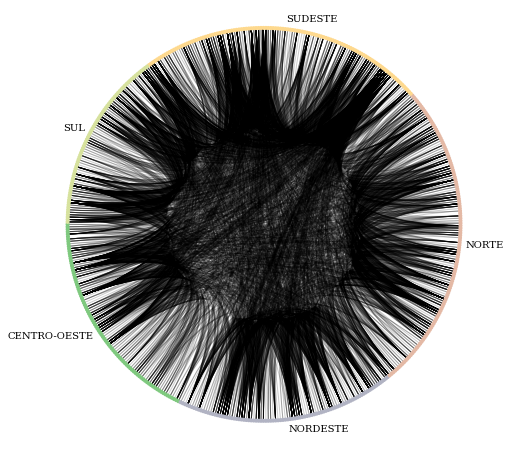

In [ ]:
# create a Circos Plot
c = nv.CircosPlot(G,
                  node_color="region",
                  node_grouping="region",
                  node_order="region",
                  group_order="alphabetically",
                  group_legend=False,
                  node_labels=False,
                  group_label_position="middle",
                  group_label_color=False,figsize=(10,8))

# Draw c to the screen
c.draw()

# Save figure
plt.savefig("assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

# Display graph
plt.show()
# a rede é assortativa 

In [ ]:
nx.attribute_assortativity_coefficient(G, 'region') # assortativity, because the coef > 0

0.3745154275488335

In [ ]:
# mixing matrix
# dimension of this matrix is proportional to number of groups
# in this case, 5 x 5
nx.attribute_mixing_matrix(G, 'region') # from the matrix, it is possible to see that elements of the same group tend to connect more

array([[0.07358156, 0.01340869, 0.04022606, 0.0070922 , 0.0120789 ],
       [0.01340869, 0.0802305 , 0.05474291, 0.01983599, 0.0106383 ],
       [0.04022606, 0.05474291, 0.17309397, 0.02759309, 0.03390957],
       [0.0070922 , 0.01983599, 0.02759309, 0.13453014, 0.02293883],
       [0.0120789 , 0.0106383 , 0.03390957, 0.02293883, 0.05363475]])

## Degree assortativity

Perform a bivariate analysis between the degree of the vertex and the average number of neighbors

#### Organizing data

In [27]:
north = []
northeast = []
south = []
southeast = []
central_west = []

for node in G.nodes:
  if G.nodes[node]['region'] == 'NORTE':
    north.append(node)
  elif G.nodes[node]['region'] == 'NORDESTE':
    northeast.append(node)
  elif G.nodes[node]['region'] == 'SUL':
    south.append(node)
  elif G.nodes[node]['region'] == 'SUDESTE':
    southeast.append(node)
  elif G.nodes[node]['region'] == 'CENTRO-OESTE':
    central_west.append(node)

In [28]:
G_north = G.subgraph(north)
G_northeast = G.subgraph(northeast)
G_south = G.subgraph(south)
G_southeast = G.subgraph(southeast)
G_central_west = G.subgraph(central_west)

#### Bivariate analysis

Brazil

In [37]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G).items())
dic = {
    'Degree': degree,
    'Avg_neigh_degree': avg_neigh_degree
}
data = pd.DataFrame(dic)
data.head()

,Degree,Avg_neigh_degree
0,2,76.500000
1,10,52.720000
2,15,65.522222
3,19,88.456140
4,32,75.693750


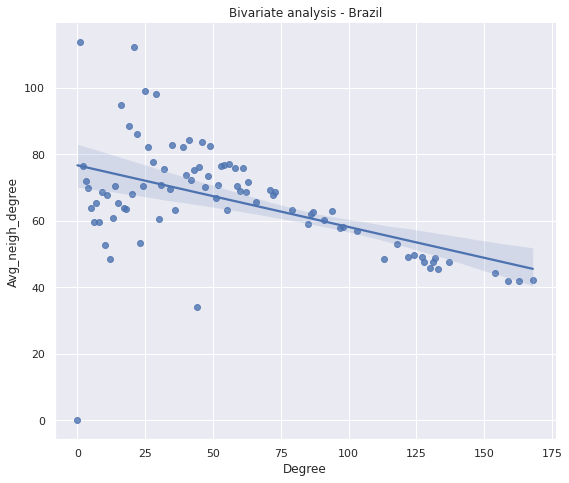

In [40]:
plot = sns.lmplot(data=data, x='Degree', y='Avg_neigh_degree').set(title='Bivariate analysis - Brazil')
plot.fig.set_figwidth(9)
plot.fig.set_figheight(7)

North

In [41]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G_north).items())
dic = {
    'Degree': degree,
    'Avg_neigh_degree': avg_neigh_degree
}
data = pd.DataFrame(dic)
data.head()

,Degree,Avg_neigh_degree
0,7,26.257143
1,27,19.037037
2,19,22.245614
3,14,19.523810
4,2,32.775000


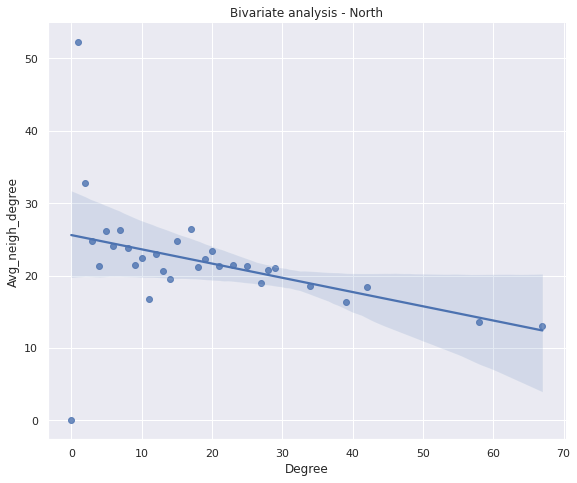

In [42]:
plot = sns.lmplot(data=data, x='Degree', y='Avg_neigh_degree').set(title='Bivariate analysis - North')
plot.fig.set_figwidth(9)
plot.fig.set_figheight(7)

Northeast

In [43]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G_northeast).items())
dic = {
    'Degree': degree,
    'Avg_neigh_degree': avg_neigh_degree
}
data = pd.DataFrame(dic)
data.head()

,Degree,Avg_neigh_degree
0,0,0.000000
1,9,25.277778
2,1,37.727273
3,10,25.250000
4,25,19.720000


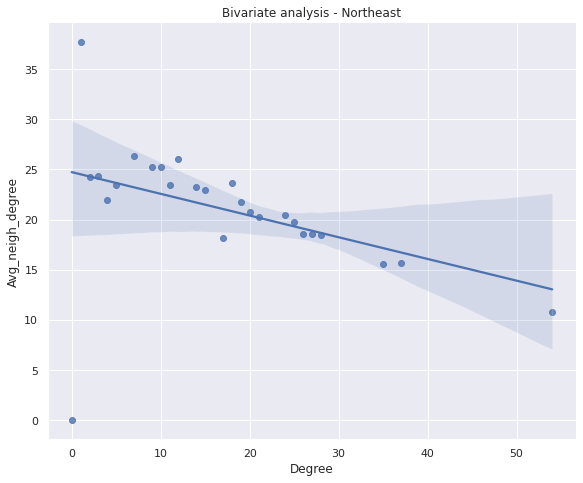

In [44]:
plot = sns.lmplot(data=data, x='Degree', y='Avg_neigh_degree').set(title='Bivariate analysis - Northeast')
plot.fig.set_figwidth(9)
plot.fig.set_figheight(7)

South

In [45]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G_south).items())
dic = {
    'Degree': degree,
    'Avg_neigh_degree': avg_neigh_degree
}
data = pd.DataFrame(dic)
data.head()

,Degree,Avg_neigh_degree
0,3,25.666667
1,1,44.454545
2,16,21.562500
3,20,21.050000
4,2,30.550000


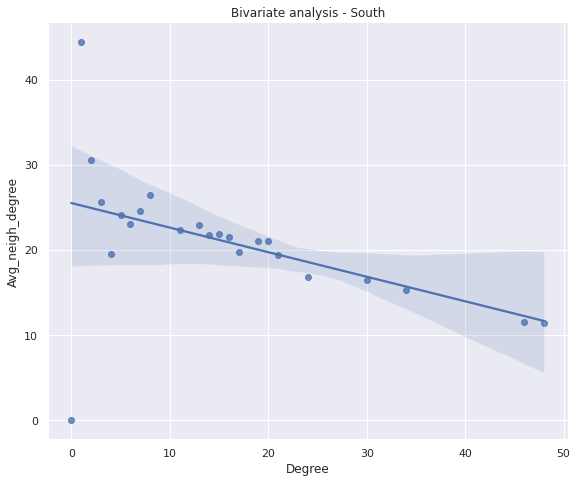

In [46]:
plot = sns.lmplot(data=data, x='Degree', y='Avg_neigh_degree').set(title='Bivariate analysis - South')
plot.fig.set_figwidth(9)
plot.fig.set_figheight(7)

Southeast

In [47]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G_southeast).items())
dic = {
    'Degree': degree,
    'Avg_neigh_degree': avg_neigh_degree
}
data = pd.DataFrame(dic)
data.head()

,Degree,Avg_neigh_degree
0,8,24.187500
1,16,36.958333
2,4,41.800000
3,5,40.128571
4,21,37.976190


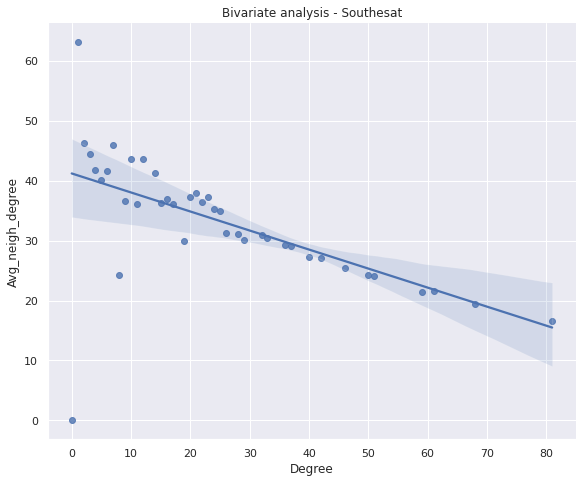

In [48]:
plot = sns.lmplot(data=data, x='Degree', y='Avg_neigh_degree').set(title='Bivariate analysis - Southesat')
plot.fig.set_figwidth(9)
plot.fig.set_figheight(7)

Central-West

In [49]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G_central_west).items())
dic = {
    'Degree': degree,
    'Avg_neigh_degree': avg_neigh_degree
}
data = pd.DataFrame(dic)
data.head()

,Degree,Avg_neigh_degree
0,0,0.000000
1,8,15.437500
2,3,24.190476
3,2,22.026316
4,26,9.692308


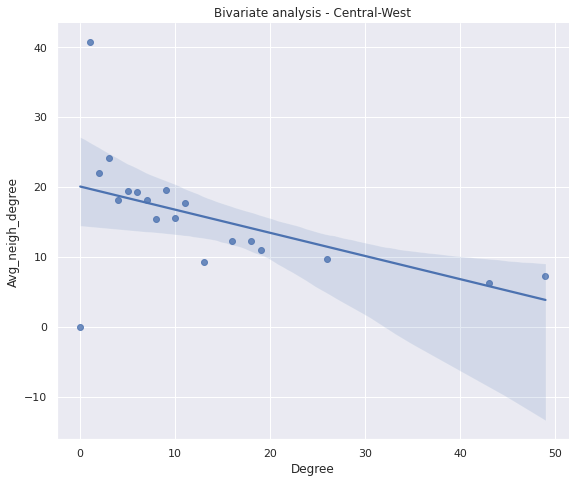

In [50]:
plot = sns.lmplot(data=data, x='Degree', y='Avg_neigh_degree').set(title='Bivariate analysis - Central-West')
plot.fig.set_figwidth(9)
plot.fig.set_figheight(7)

#### Organizing a subplot

Degree assortativity for Brazil = -0.1952

Degree assortativity for North = -0.2201

Degree assortativity for Northeast = -0.3174

Degree assortativity for South = -0.3587

Degree assortativity for Southeast = -0.3643

Degree assortativity for Central-West = -0.3499



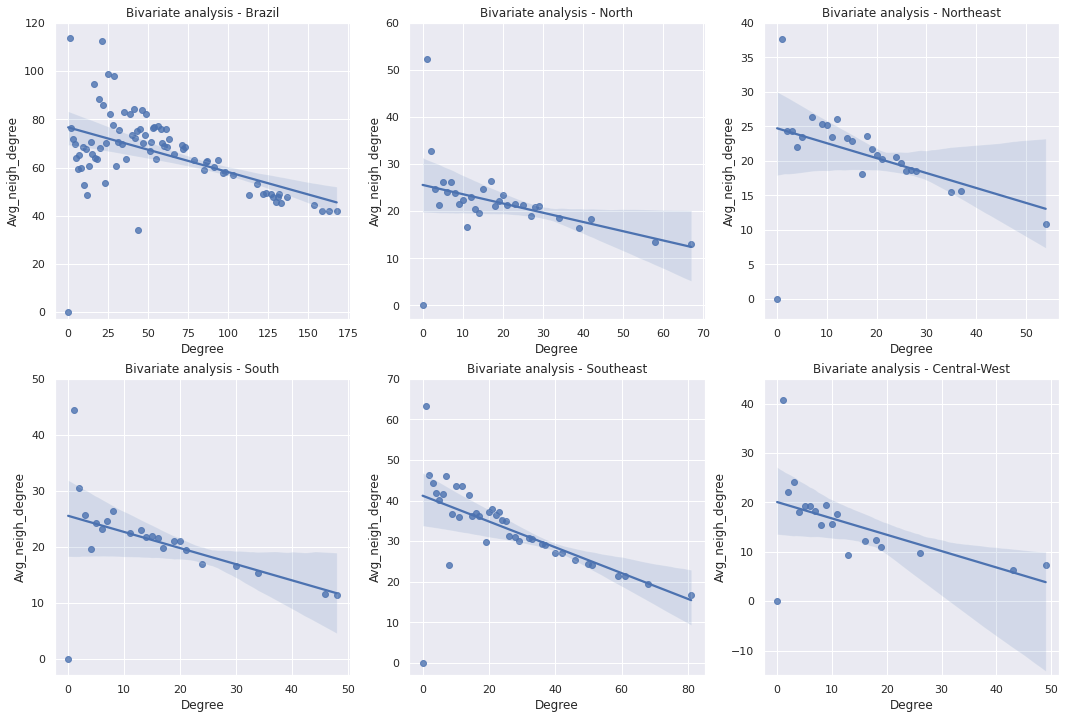

In [51]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

list_names = ['Brazil', 'North', 'Northeast', 'South', 'Southeast', 'Central-West']
list_nodes = [G, G_north, G_northeast, G_south, G_southeast, G_central_west]
list_limits= [[-3,120], [-3,60], [-3,40], [-3,50], [-3,70], [-15,45]]

row=0
col=0
for i in range(6):
  if i == 3:
    row=1
    col=0
  degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(list_nodes[i]).items())
  coef = round(nx.degree_assortativity_coefficient(list_nodes[i]), 4)
  print(f'Degree assortativity for {list_names[i]} = {coef}\n')
  dic = { 'Degree': degree, 'Avg_neigh_degree': avg_neigh_degree }
  data = pd.DataFrame(dic)
  plot = sns.regplot(ax=axes[row, col], data=data, x='Degree', y='Avg_neigh_degree').set(title=f'Bivariate analysis - {list_names[i]}')
  axes[row, col].set_ylim(list_limits[i][0],list_limits[i][1])
  col += 1


## Connected components

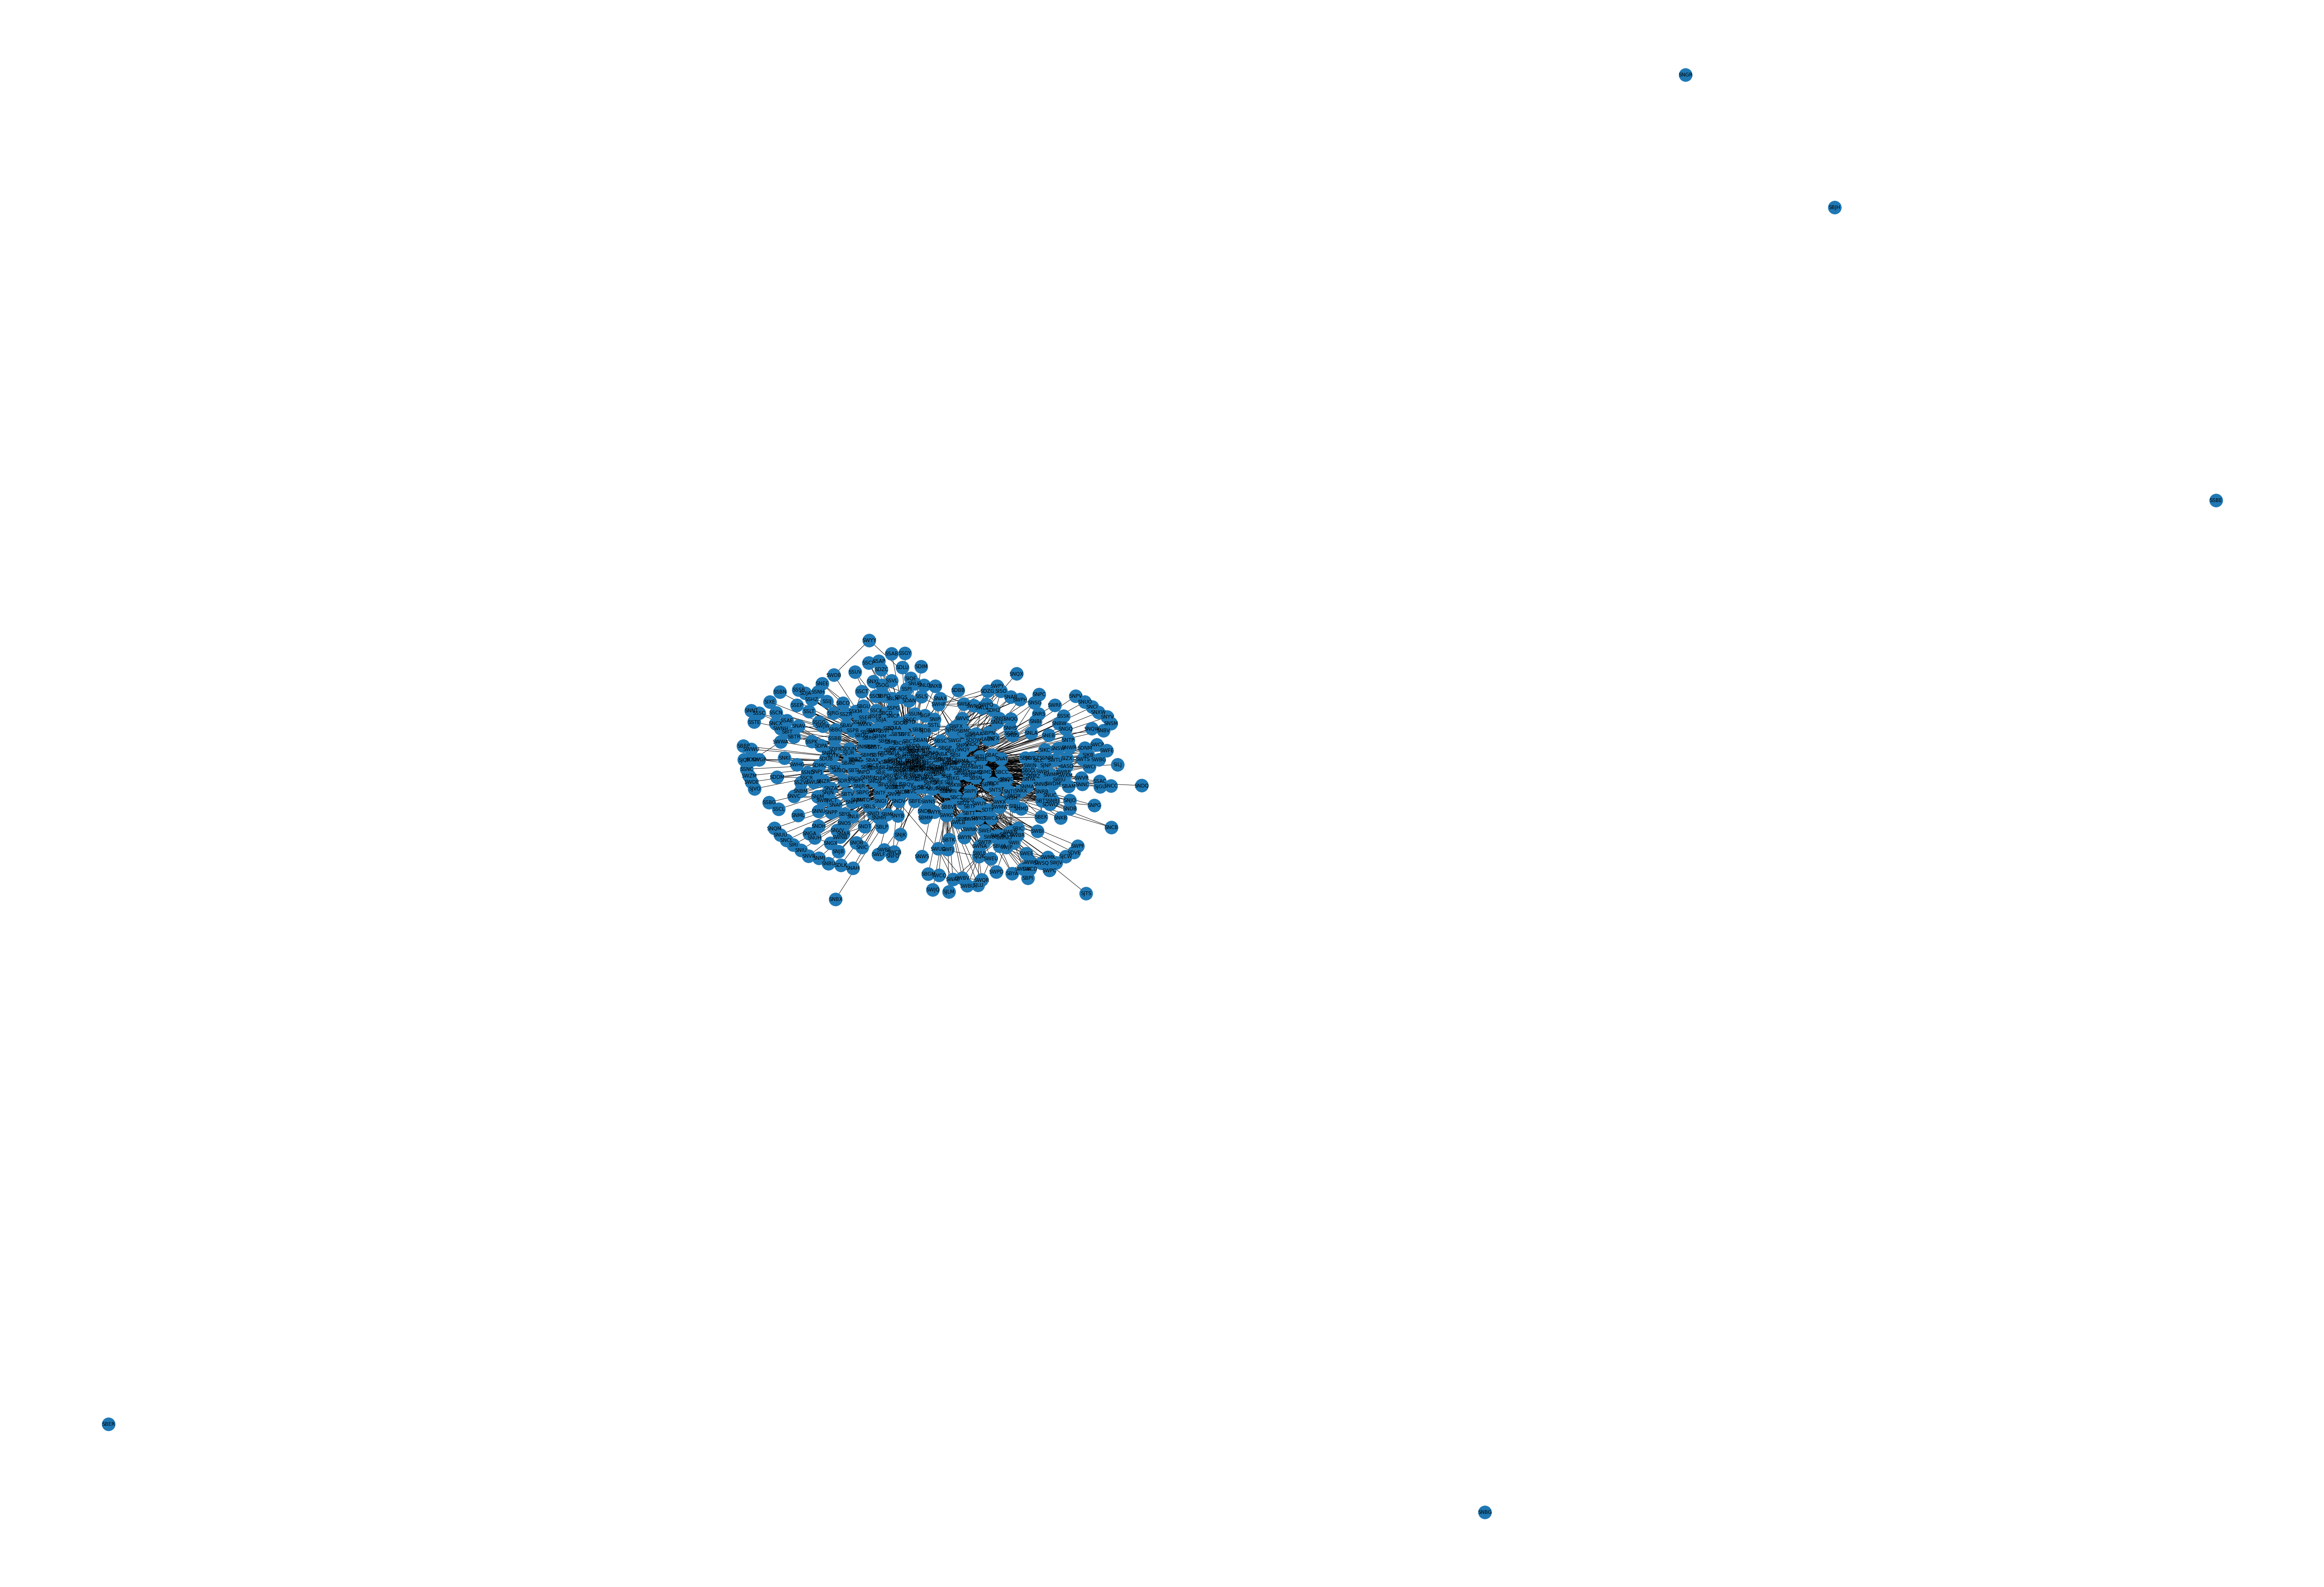

In [ ]:
# draw the graph
fig, ax = plt.subplots(1, 1,figsize=(100,70))
nx.draw_networkx(G, ax=ax,node_size=1000)
plt.axis("off")
plt.show()

In [ ]:
# G is connected or not?
nx.is_connected(G)

False

In [ ]:
# how many connected components has G?
nx.number_connected_components(G)

6

In [ ]:
for node in G.nodes:
  print(G.nodes[node]['region'])

CENTRO-OESTE
NORDESTE
NORTE
NORDESTE
NORDESTE
NORTE
CENTRO-OESTE
SUDESTE
NORTE
SUDESTE
SUDESTE
NORTE
SUDESTE
SUL
NORDESTE
NORTE
SUDESTE
NORDESTE
SUL
NORTE
NORTE
NORTE
CENTRO-OESTE
NORTE
SUDESTE
CENTRO-OESTE
NORTE
SUDESTE
SUDESTE
SUDESTE
NORDESTE
NORDESTE
NORDESTE
CENTRO-OESTE
SUL
NORDESTE
SUDESTE
SUL
SUL
NORTE
NORDESTE
NORTE
CENTRO-OESTE
CENTRO-OESTE
CENTRO-OESTE
CENTRO-OESTE
NORDESTE
SUDESTE
SUL
SUDESTE
CENTRO-OESTE
CENTRO-OESTE
NORDESTE
SUDESTE
NORDESTE
NORTE
NORTE
CENTRO-OESTE
SUDESTE
SUL
NORTE
NORTE
NORTE
NORDESTE
CENTRO-OESTE
NORTE
NORTE
CENTRO-OESTE
SUDESTE
SUDESTE
SUDESTE
NORTE
CENTRO-OESTE
SUL
SUDESTE
SUL
NORTE
SUDESTE
CENTRO-OESTE
NORTE
NORTE
NORTE
SUDESTE
SUDESTE
NORDESTE
NORDESTE
NORTE
CENTRO-OESTE
SUDESTE
NORTE
SUDESTE
NORTE
SUL
SUDESTE
CENTRO-OESTE
NORTE
SUL
CENTRO-OESTE
SUL
NORTE
SUDESTE
SUDESTE
SUL
NORTE
NORDESTE
NORTE
SUDESTE
SUDESTE
CENTRO-OESTE
SUL
SUDESTE
SUDESTE
NORTE
NORTE
NORTE
NORDESTE
NORDESTE
CENTRO-OESTE
SUDESTE
CENTRO-OESTE
CENTRO-OESTE
NORTE
CENTRO-OESTE
NOR

In [ ]:
for component in nx.connected_components(G):
  print(component)

{'SWYK', 'SNBI', 'SBJI', 'SNUU', 'SNBU', 'SNBW', 'SWKC', 'SBMI', 'SBEK', 'SBBU', 'SBCB', 'SBMA', 'SNAP', 'SSOG', 'SBJP', 'SNWR', 'SWLF', 'SDZG', 'SBPK', 'SBGM', 'SJLU', 'SWNA', 'SWIQ', 'SNTP', 'SDAA', 'SJDB', 'SWPF', 'SBIP', 'SBBP', 'SBPC', 'SNJB', 'SSLS', 'SNPP', 'SWLC', 'SBCA', 'SBAR', 'SNPY', 'SBFI', 'SSCN', 'SBCJ', 'SNML', 'SWBV', 'SBMC', 'SWBZ', 'SWBU', 'SSSK', 'SNCX', 'SBUG', 'SBBH', 'SWVR', 'SWJN', 'SWNB', 'SIMK', 'SNIP', 'SJLM', 'SDCG', 'SBCN', 'SBKP', 'SNEE', 'SILJ', 'SNPG', 'SWPD', 'SNJK', 'SSNM', 'SNEB', 'SNUO', 'SWMP', 'SBGL', 'SBRP', 'SBRJ', 'SWPJ', 'SBPP', 'SSOE', 'SDFR', 'SBNF', 'SWNK', 'SNUI', 'SWNH', 'SNRB', 'SBBV', 'SBMD', 'SBMK', 'SNZA', 'SNAT', 'SNDM', 'SNLA', 'SBCY', 'SDAG', 'SWCA', 'SBFC', 'SWOB', 'SSGY', 'SBME', 'SWPH', 'SBTU', 'SSZW', 'SSOU', 'SSTE', 'SNRJ', 'SBLN', 'SNNU', 'SBJA', 'SWKK', 'SBIZ', 'SWPC', 'SBCP', 'SBSC', 'SBBR', 'SSVL', 'SBVT', 'SBVG', 'SWYN', 'SNMA', 'SBEG', 'SBCV', 'SBJU', 'SWRP', 'SBAS', 'SDNM', 'SJHG', 'SWGI', 'SWJW', 'SBIL', 'SNYB', 'SSNC',

In [ ]:
for component in nx.connected_components(G):
  northeast = 0
  south = 0 
  north = 0 
  southeast = 0
  centerwest = 0
  for node in component:
    if G.nodes[node]['region'] == 'NORDESTE':
      northeast +=1
    elif G.nodes[node]['region'] == 'SUDESTE':
      southeast +=1
    elif G.nodes[node]['region'] == 'NORTE':
      north +=1
    elif G.nodes[node]['region'] == 'SUL':
      south +=1
    elif  G.nodes[node]['region'] == 'CENTRO-OESTE':
      centerwest +=1
  all = northeast + southeast + south + north + centerwest

  print(component)
  print(f'Quantity per component in each region\nNortheast: {northeast} \nSoutheast: {southeast} \nNorth: {north} \nSouth: {south} \nCenter-West: {centerwest}\n')
  print(f'% per component in each region\nNortheast:: {round(northeast/all*100, 2)}% \nSoutheast: {round(southeast/all*100, 2)}% \nNorth: {round(north/all*100, 2)}% \nSouth: {round(south/all*100, 2)}% \nCenter-West: {round(centerwest/all*100, 2)}%')
  print('\n')

{'SWYK', 'SNBI', 'SBJI', 'SNUU', 'SNBU', 'SNBW', 'SWKC', 'SBMI', 'SBEK', 'SBBU', 'SBCB', 'SBMA', 'SNAP', 'SSOG', 'SBJP', 'SNWR', 'SWLF', 'SDZG', 'SBPK', 'SBGM', 'SJLU', 'SWNA', 'SWIQ', 'SNTP', 'SDAA', 'SJDB', 'SWPF', 'SBIP', 'SBBP', 'SBPC', 'SNJB', 'SSLS', 'SNPP', 'SWLC', 'SBCA', 'SBAR', 'SNPY', 'SBFI', 'SSCN', 'SBCJ', 'SNML', 'SWBV', 'SBMC', 'SWBZ', 'SWBU', 'SSSK', 'SNCX', 'SBUG', 'SBBH', 'SWVR', 'SWJN', 'SWNB', 'SIMK', 'SNIP', 'SJLM', 'SDCG', 'SBCN', 'SBKP', 'SNEE', 'SILJ', 'SNPG', 'SWPD', 'SNJK', 'SSNM', 'SNEB', 'SNUO', 'SWMP', 'SBGL', 'SBRP', 'SBRJ', 'SWPJ', 'SBPP', 'SSOE', 'SDFR', 'SBNF', 'SWNK', 'SNUI', 'SWNH', 'SNRB', 'SBBV', 'SBMD', 'SBMK', 'SNZA', 'SNAT', 'SNDM', 'SNLA', 'SBCY', 'SDAG', 'SWCA', 'SBFC', 'SWOB', 'SSGY', 'SBME', 'SWPH', 'SBTU', 'SSZW', 'SSOU', 'SSTE', 'SNRJ', 'SBLN', 'SNNU', 'SBJA', 'SWKK', 'SBIZ', 'SWPC', 'SBCP', 'SBSC', 'SBBR', 'SSVL', 'SBVT', 'SBVG', 'SWYN', 'SNMA', 'SBEG', 'SBCV', 'SBJU', 'SWRP', 'SBAS', 'SDNM', 'SJHG', 'SWGI', 'SWJW', 'SBIL', 'SNYB', 'SSNC',

## Shortest path

Create a simulated scenario, where you want to take a trip with the following route:

*   City 1 (North) to city 2 (South)
*   City 2 (South) to city 3 (Northeast)
*   City 3 (Northeast) to city 4 (Central-West)
*   City 4 (Central-West) to city 5 (Southeast)

#### Choosing cities from the 5 regions of Brazil

In [52]:
cities = {
    'North': 'SNNG', #City: NOVO PROGRESSO
    'Northeast': 'SBIL', #City: ILHÉUS
    'South': 'SSCN', #City: CANELA
    'Southeast': 'SBRP', #City: RIBEIRÃO PRETO
    'Central-West': 'SBAN' #City: ANÁPOLIS
}

#### North to South

In [53]:
path1 = nx.shortest_path(G, cities['North'], cities['South'])
path1_len = nx.shortest_path_length(G, cities['North'], cities['South'])

c1 = G.nodes[path1[0]]['name']
c2 = G.nodes[path1[1]]['name'] 
c3 = G.nodes[path1[2]]['name'] 
c4 = G.nodes[path1[3]]['name']  

print(f'Shortest path from North to South: {path1}')
print(f'Shortest path length from North to South: {path1_len}')
print(f'Cities in this path: {c1} -> {c2} -> {c3} -> {c4}')

Shortest path from North to South: ['SNNG', 'SBSN', 'SBPA', 'SSCN']
Shortest path length from North to South: 3
Cities in this path: NOVO PROGRESSO -> SANTARÉM -> PORTO ALEGRE -> CANELA


#### South to Northeast

In [54]:
path2 = nx.shortest_path(G, cities['South'], cities['Northeast'])
path2_len = nx.shortest_path_length(G, cities['South'], cities['Northeast'])

c5 = G.nodes[path2[0]]['name']
c6 = G.nodes[path2[1]]['name'] 
c7 = G.nodes[path2[2]]['name'] 

print(f'Shortest path from South to Northeast: {path2}')
print(f'Shortest path length from South to Northeast: {path2_len}')
print(f'Cities in this path: {c5} -> {c6} -> {c7}')

Shortest path from South to Northeast: ['SSCN', 'SBPA', 'SBIL']
Shortest path length from South to Northeast: 2
Cities in this path: CANELA -> PORTO ALEGRE -> ILHÉUS


#### Northeast to Central-West

In [55]:
path3 = nx.shortest_path(G, cities['Northeast'], cities['Central-West'])
path3_len = nx.shortest_path_length(G, cities['Northeast'], cities['Central-West'])

c8 = G.nodes[path3[0]]['name']
c9 = G.nodes[path3[1]]['name']

print(f'Shortest path from Northeast to Central-West: {path3}')
print(f'Shortest path length from Northeast to Central-West: {path3_len}')
print(f'Cities in this path: {c8} -> {c9}')

Shortest path from Northeast to Central-West: ['SBIL', 'SBAN']
Shortest path length from Northeast to Central-West: 1
Cities in this path: ILHÉUS -> ANÁPOLIS


#### Central-West to Southeast

In [56]:
path4 = nx.shortest_path(G, cities['Central-West'], cities['Southeast'])
path4_len = nx.shortest_path_length(G, cities['Central-West'], cities['Southeast'])

c10 = G.nodes[path4[0]]['name']
c11 = G.nodes[path4[1]]['name']

print(f'Shortest path from Central-West to Southeast: {path4}')
print(f'Shortest path length from Central-West to Southeast: {path4_len}')
print(f'Cities in this path: {c10} -> {c11}')

Shortest path from Central-West to Southeast: ['SBAN', 'SBRP']
Shortest path length from Central-West to Southeast: 1
Cities in this path: ANÁPOLIS -> RIBEIRÃO PRETO


#### Complete path

In [57]:
path_comp = path1 + path2 + path3 + path4
path_comp_len = path1_len + path2_len + path3_len + path4_len

print(f'Shortest path from North -> South -> Northeast -> Central-West -> Southeast: {path_comp}')
print(f'Shortest path length from North -> South -> Northeast -> Central-West -> Southeast: {path_comp_len}')
print(f'Cities in this path: {c1} -> {c2} -> {c3} -> {c5} -> {c6} -> {c8} -> {c9} -> {c11}')

Shortest path from North -> South -> Northeast -> Central-West -> Southeast: ['SNNG', 'SBSN', 'SBPA', 'SSCN', 'SSCN', 'SBPA', 'SBIL', 'SBIL', 'SBAN', 'SBAN', 'SBRP']
Shortest path length from North -> South -> Northeast -> Central-West -> Southeast: 7
Cities in this path: NOVO PROGRESSO -> SANTARÉM -> PORTO ALEGRE -> CANELA -> PORTO ALEGRE -> ILHÉUS -> ANÁPOLIS -> RIBEIRÃO PRETO
